The Sparks Foundation

Name: Payal Rakhama Paymode

Batch: May

Domain: Data Science and Bussiness Analytics

Task 4: Exploratory Data Analysis - Terrorism

In [1]:
import math
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
     

In [3]:
df.head().iloc[:,100:]

,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [5]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
9673,1.979110e+11,1979,11,17,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9674,1.979110e+11,1979,11,17,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,0.0,1.0,NaN
9675,1.979110e+11,1979,11,17,NaN,1,12/5/1979,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
9676,1.979110e+11,1979,11,18,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
9677,1.979110e+11,1979,11,18,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(9678, 135)

In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,9.678000e+03,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9375.000000,9375.000000,9678.000000,...,2.840000e+02,1.0,7.900000e+01,1.0,451.000000,349.000000,9677.000000,9677.000000,9677.000000,9677.000000
mean,1.976042e+11,1975.978818,6.292726,15.166253,0.026452,220.100951,6.015809,33.115933,-20.935989,1.203348,...,4.984110e+06,20000.0,1.498046e+06,0.0,2.815965,6.320917,-3.151080,-3.097654,0.347525,-1.826702
std,2.889485e+08,2.890883,3.371763,9.012074,0.160483,187.136006,3.291629,22.181102,53.271695,0.823584,...,5.961177e+07,NaN,5.104807e+06,NaN,1.261150,23.197556,4.430707,4.482508,0.663857,4.232329
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.974060e+11,1974.000000,3.000000,7.000000,0.000000,96.000000,2.000000,24.801598,-73.931351,1.000000,...,0.000000e+00,20000.0,6.000000e+03,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.977060e+11,1977.000000,6.000000,15.000000,0.000000,185.000000,8.000000,40.697132,-5.956210,1.000000,...,1.100000e+04,20000.0,8.000000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.979010e+11,1979.000000,9.000000,23.000000,0.000000,217.000000,8.000000,46.496714,11.115921,1.000000,...,5.000000e+05,20000.0,1.000000e+06,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.979110e+11,1979.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,187.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9678 entries, 0 to 9677
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 10.0+ MB


Data Preprocessing

In [10]:
null_sum=(df.isnull().sum()/len(df))*100
percent_null=null_sum.sort_values(ascending=False)
type(percent_null)
high_null_column=percent_null[percent_null>=50]
less_than_50_null_column=percent_null[~percent_null.isin(high_null_column)]
print(f'Number of column where null value less than fifty percent {len(less_than_50_null_column)}')
less_null_column=less_than_50_null_column.index.to_list()
print(less_null_column)

Number of column where null value less than fifty percent 49
['nwound', 'weapsubtype1_txt', 'weapsubtype1', 'nkill', 'weapdetail', 'targsubtype1', 'targsubtype1_txt', 'latitude', 'longitude', 'ransom', 'ishostkid', 'target1', 'provstate', 'natlty1', 'natlty1_txt', 'INT_ANY', 'INT_IDEO', 'INT_MISC', 'INT_LOG', 'dbsource', 'guncertain1', 'property', 'individual', 'weaptype1', 'weaptype1_txt', 'iyear', 'gname', 'targtype1_txt', 'targtype1', 'imonth', 'attacktype1_txt', 'attacktype1', 'iday', 'extended', 'country', 'country_txt', 'region', 'region_txt', 'suicide', 'city', 'success', 'multiple', 'doubtterr', 'specificity', 'vicinity', 'crit3', 'crit2', 'crit1', 'eventid']


In [11]:
new_df=df[less_null_column]

In [17]:

check=new_df.columns.to_list()

In [18]:
selected_columns_1=['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt','city','multiple', 'success', 'suicide', 
 'attacktype1_txt', 'targtype1_txt',  'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'weaptype1_txt','nkill','nwoundus', 'claimed', 'individual', 'INT_LOG', 'doubtterr']
     

In [19]:
len(check)-len(selected_columns_1)

26

In [20]:
print(list((set(check)) - (set(selected_columns_1))))

['weapdetail', 'region', 'crit1', 'nwound', 'attacktype1', 'weapsubtype1_txt', 'INT_ANY', 'INT_IDEO', 'weapsubtype1', 'guncertain1', 'crit3', 'specificity', 'latitude', 'targtype1', 'ishostkid', 'targsubtype1', 'property', 'natlty1', 'INT_MISC', 'vicinity', 'provstate', 'dbsource', 'crit2', 'country', 'longitude', 'ransom', 'extended', 'weaptype1', 'gname']


In [21]:
df_1=df[selected_columns_1]

In [22]:
df_1.T

,0,1,2,3,4,5,6,7,8,9,...,9668,9669,9670,9671,9672,9673,9674,9675,9676,9677
eventid,197000000000.0,197000000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,197001000000.0,...,197911000000.0,197911000000.0,197911000000.0,197911000000.0,197911000000.0,197911000000.0,197911000000.0,197911000000.0,197911000000.0,197911000000.0
iyear,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,...,1979,1979,1979,1979,1979,1979,1979,1979,1979,1979
imonth,7,0,1,1,1,1,1,1,1,1,...,11,11,11,11,11,11,11,11,11,11
iday,2,0,0,0,0,1,2,2,2,3,...,16,16,16,16,17,17,17,17,18,18
country_txt,Dominican Republic,Mexico,Philippines,Greece,Japan,United States,Uruguay,United States,United States,United States,...,El Salvador,El Salvador,El Salvador,Spain,El Salvador,Colombia,Spain,Colombia,United States,United States
region_txt,Central America & Caribbean,North America,Southeast Asia,Western Europe,East Asia,North America,South America,North America,North America,North America,...,Central America & Caribbean,Central America & Caribbean,Central America & Caribbean,Western Europe,Central America & Caribbean,South America,Western Europe,South America,North America,North America
city,Santo Domingo,Mexico city,Unknown,Athens,Fukouka,Cairo,Montevideo,Oakland,Madison,Madison,...,San Salvador,San Salvador,San Salvador,Bilbao,San Salvador,Bogota,Bilbao,Tierralta,New York City,New York City
multiple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
success,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,1,0
suicide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
(df_1.isnull().sum()/len(df_1))*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
country_txt          0.000000
region_txt           0.000000
city                 0.000000
multiple             0.000000
success              0.000000
suicide              0.000000
attacktype1_txt      0.000000
targtype1_txt        0.000000
targsubtype1_txt     6.282290
corp1               63.277537
target1              0.754288
natlty1_txt          0.278983
weaptype1_txt        0.010333
nkill               12.006613
nwoundus            88.045051
claimed             91.020872
individual           0.010333
INT_LOG              0.010333
doubtterr            0.000000
dtype: float64

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9678 entries, 0 to 9677
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eventid           9678 non-null   float64
 1   iyear             9678 non-null   int64  
 2   imonth            9678 non-null   int64  
 3   iday              9678 non-null   int64  
 4   country_txt       9678 non-null   object 
 5   region_txt        9678 non-null   object 
 6   city              9678 non-null   object 
 7   multiple          9678 non-null   int64  
 8   success           9678 non-null   int64  
 9   suicide           9678 non-null   int64  
 10  attacktype1_txt   9678 non-null   object 
 11  targtype1_txt     9678 non-null   object 
 12  targsubtype1_txt  9070 non-null   object 
 13  corp1             3554 non-null   object 
 14  target1           9605 non-null   object 
 15  natlty1_txt       9651 non-null   object 
 16  weaptype1_txt     9677 non-null   object 


In [25]:
print("Country with the most attacks:",df['country'].value_counts().idxmax())
print("City with the most attacks:",df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df['region'].value_counts().idxmax())
print("Year with the most attacks:",df['iyear'].value_counts().idxmax())
print("Month with the most attacks:",df['imonth'].value_counts().idxmax())
print("Most Extended:",df['extended'].value_counts().idxmax())
     

Country with the most attacks: 603
City with the most attacks: Unknown
Region with the most attacks: 8
Year with the most attacks: 1979
Month with the most attacks: 5
Most Extended: 0


Exploratory Data Analysis

In [26]:
attack_per_year=df_1['iyear'].value_counts()

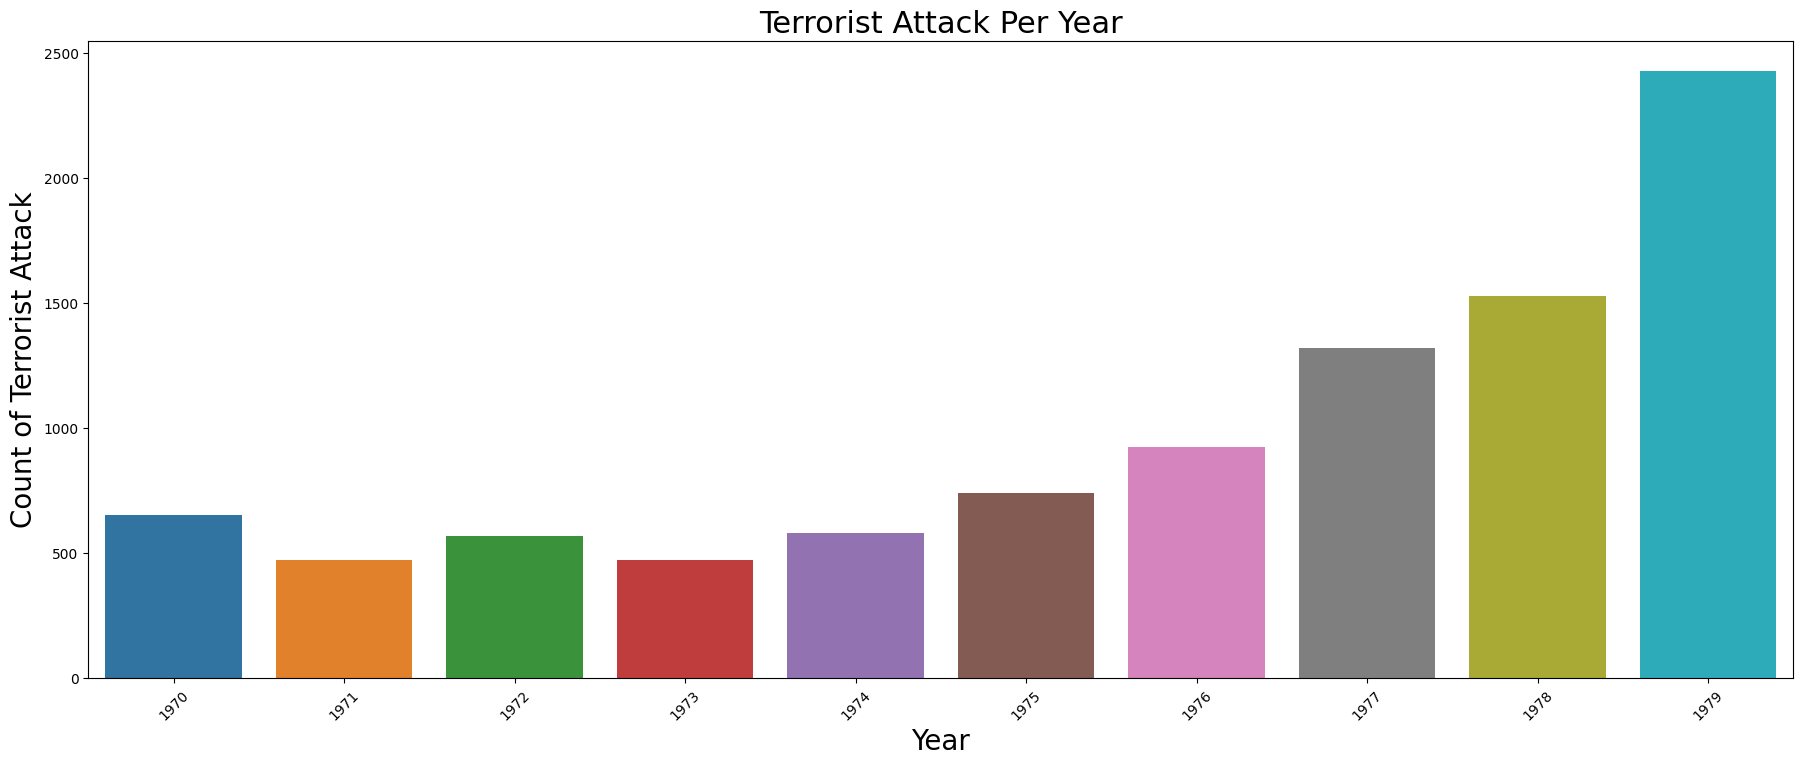

In [27]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='iyear',data=df_1)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

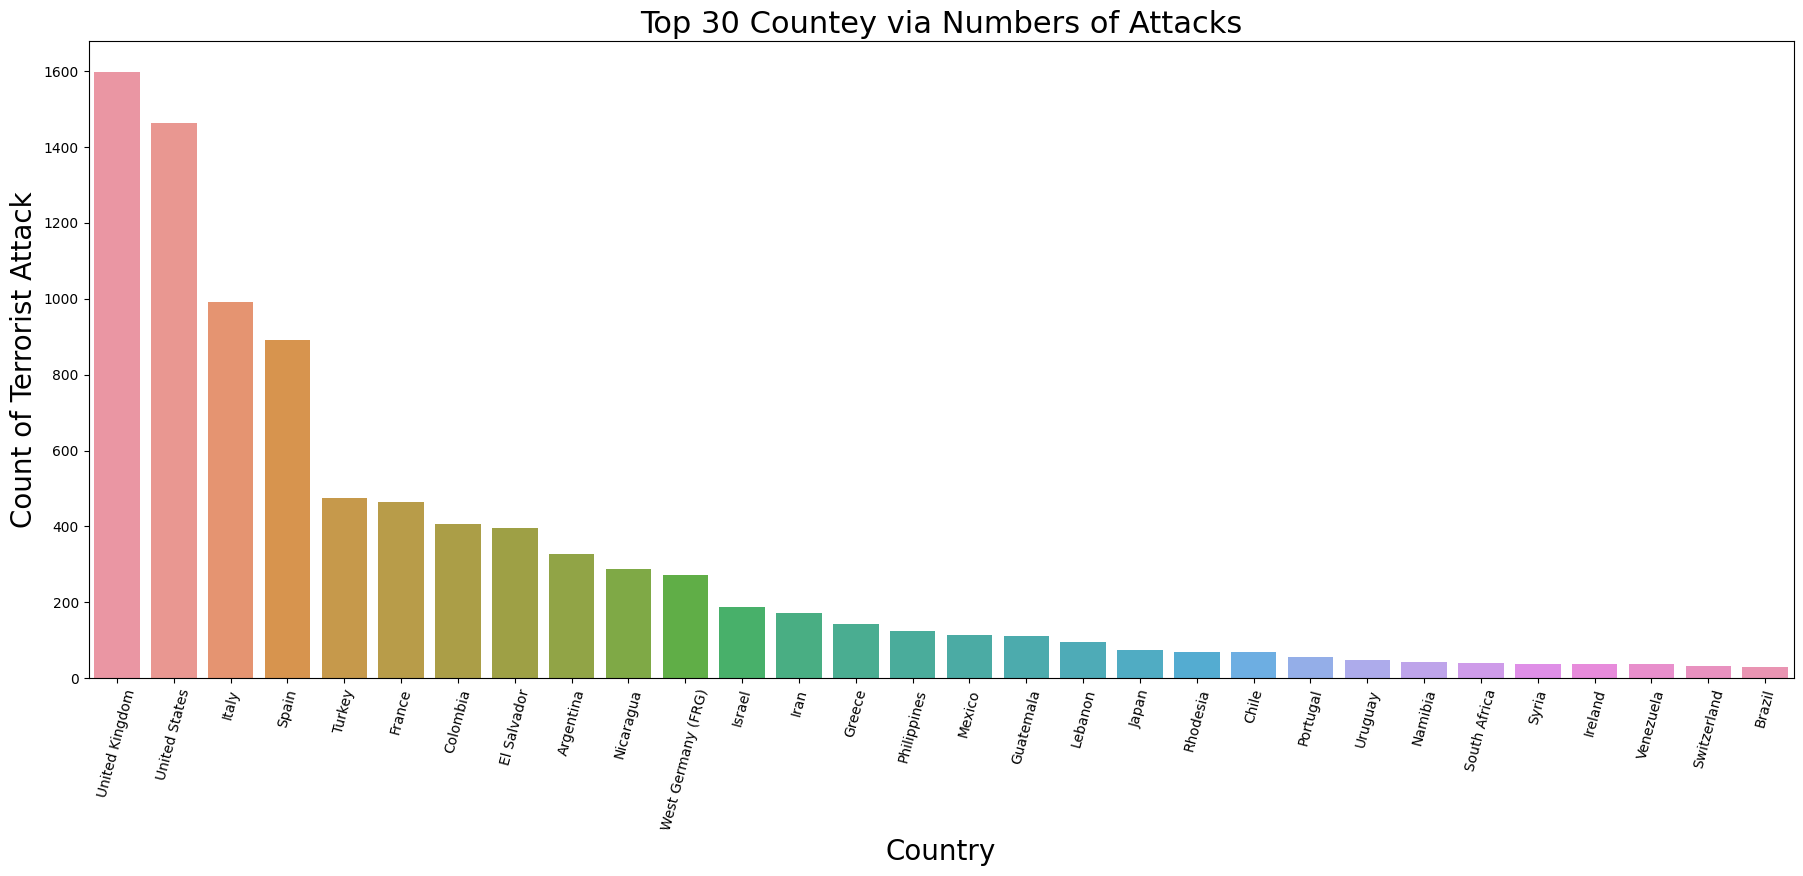

In [28]:
ax=plt.rcParams['figure.figsize'] = 22,8.27
ax=sns.countplot(x='country_txt',data=df_1,order = df_1['country_txt'].value_counts().index[:30])
ax.set_xlabel('Country',fontsize=20)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Top 30 Countey via Numbers of Attacks',fontsize=22);

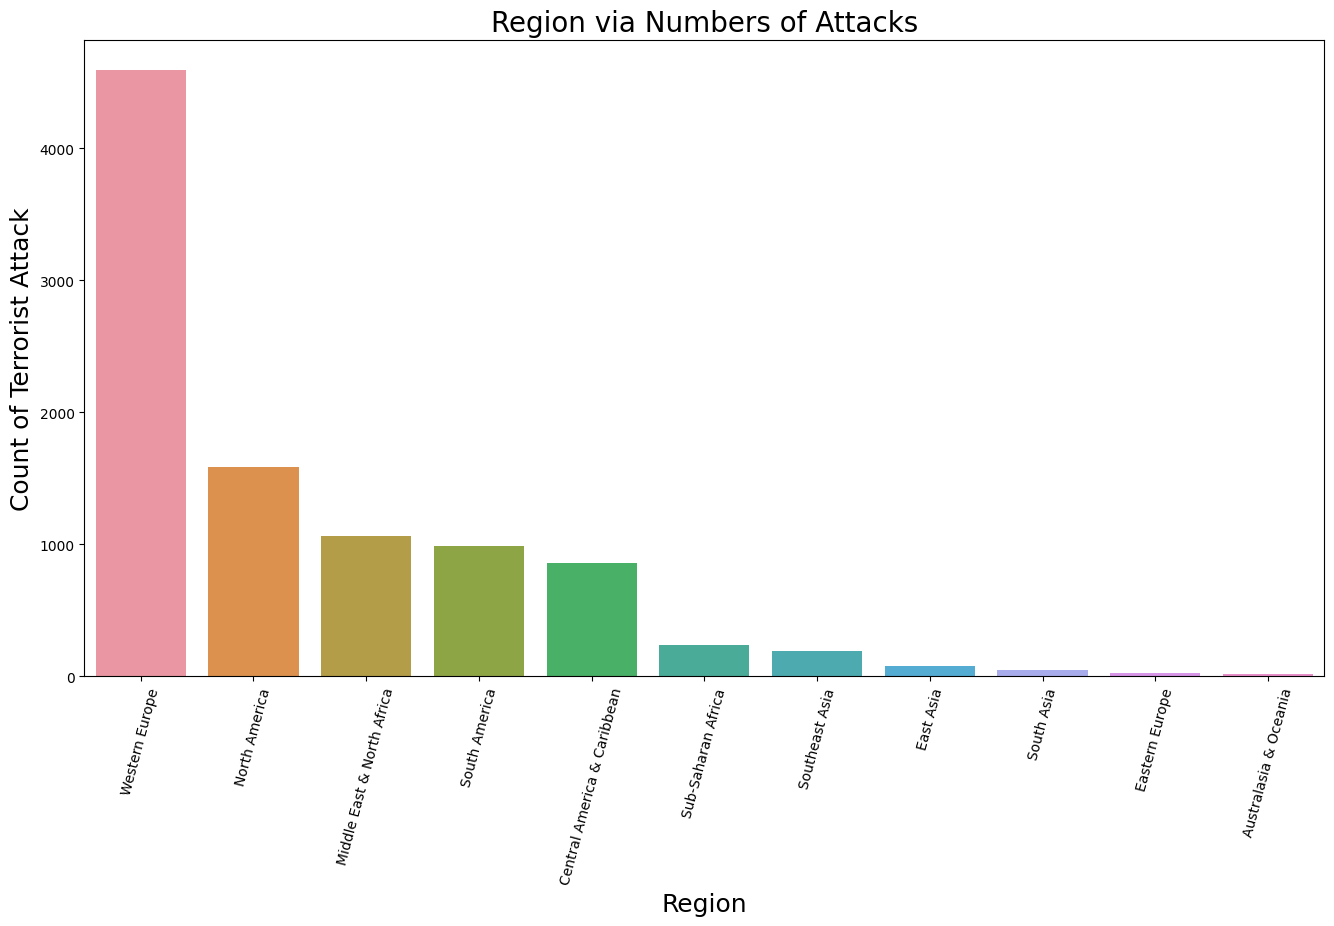

In [29]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='region_txt',data=df_1,order = df_1['region_txt'].value_counts().index)
ax.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
ax.set_title('Region via Numbers of Attacks',fontsize=20);

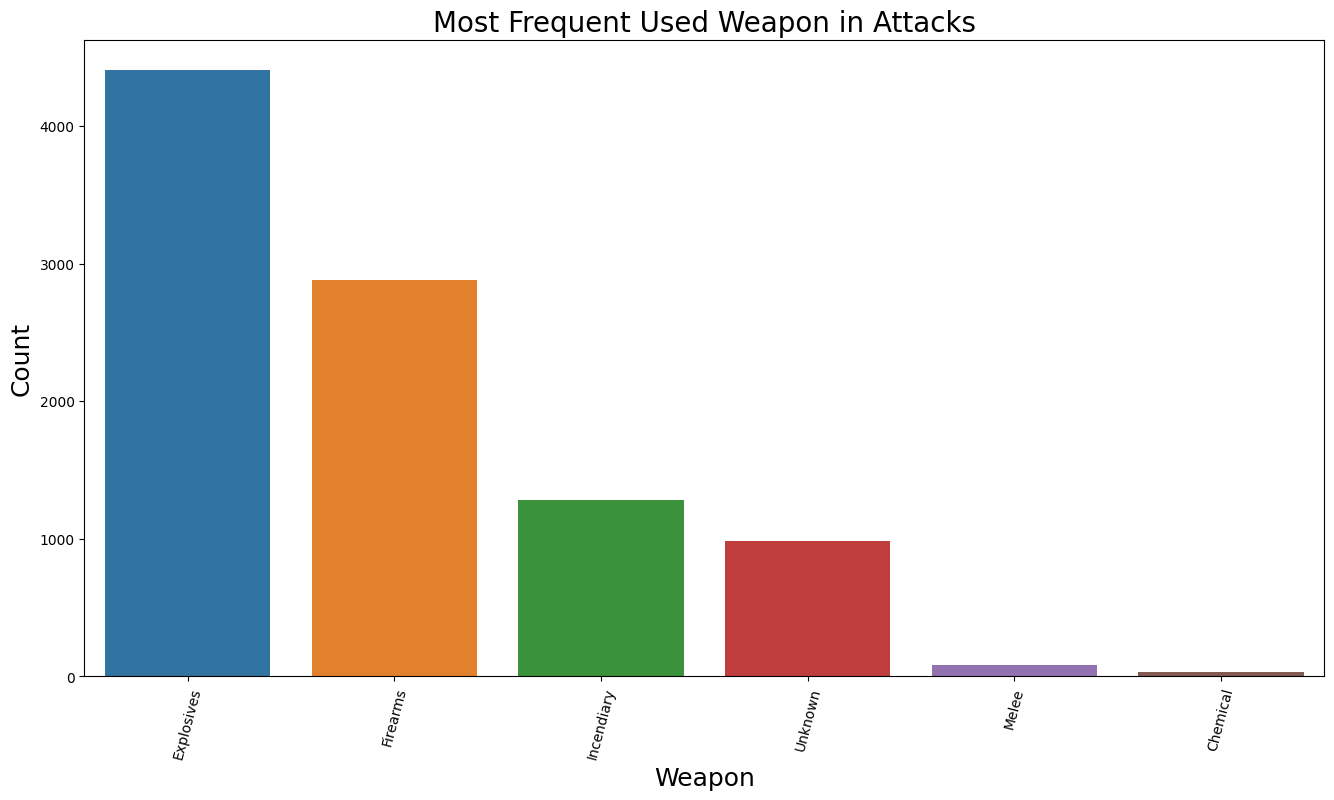

In [30]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='weaptype1_txt',data=df_1,order = df_1['weaptype1_txt'].value_counts().index[:6])
ax.set_xlabel('Weapon',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Used Weapon in Attacks',fontsize=20);

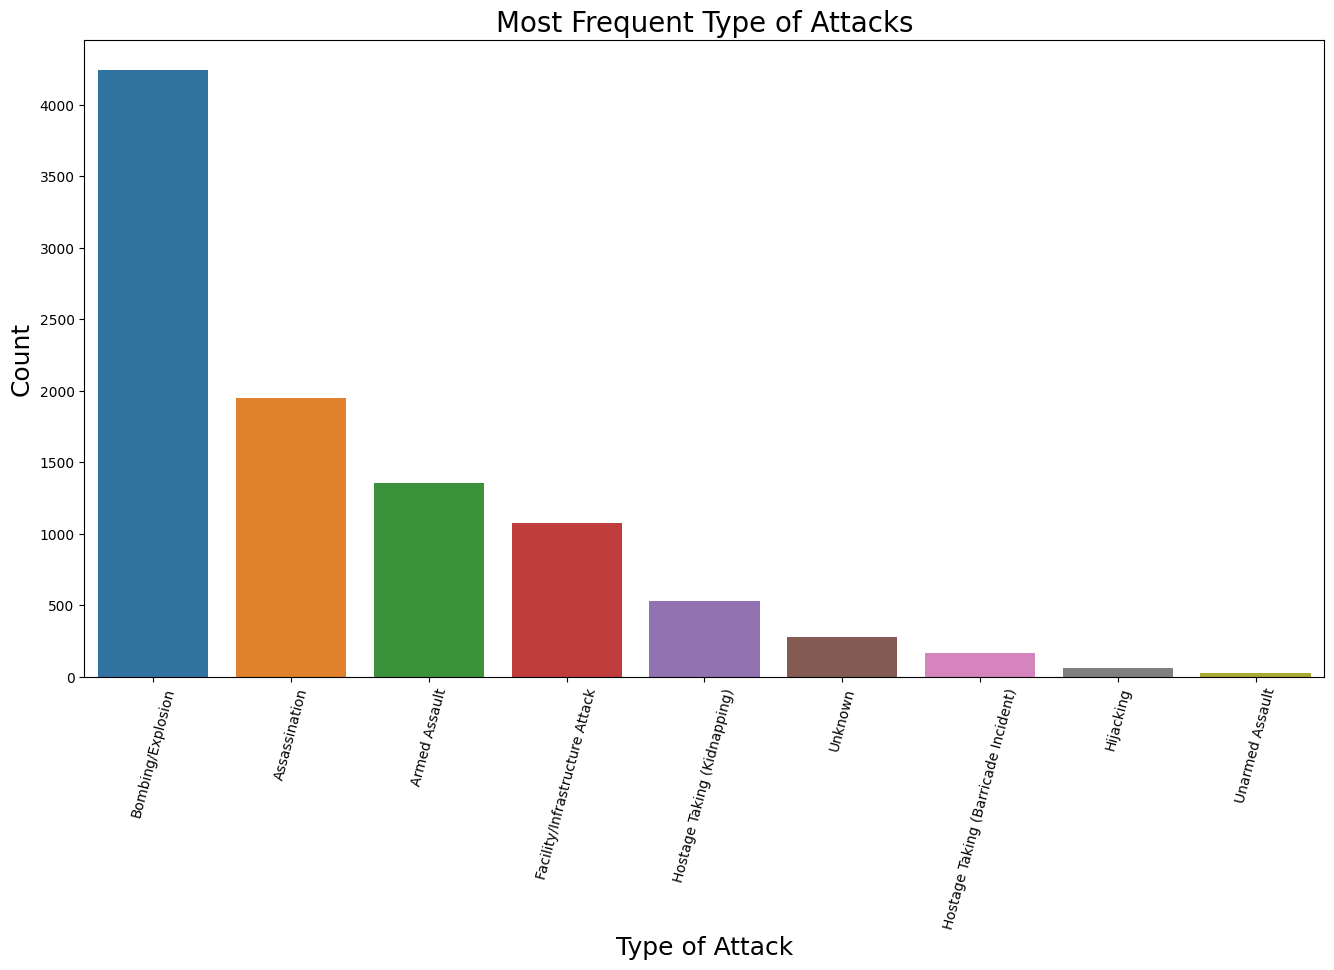

In [31]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='attacktype1_txt',data=df_1,order = df_1['attacktype1_txt'].value_counts().index)
ax.set_xlabel('Type of Attack',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Type of Attacks',fontsize=20);

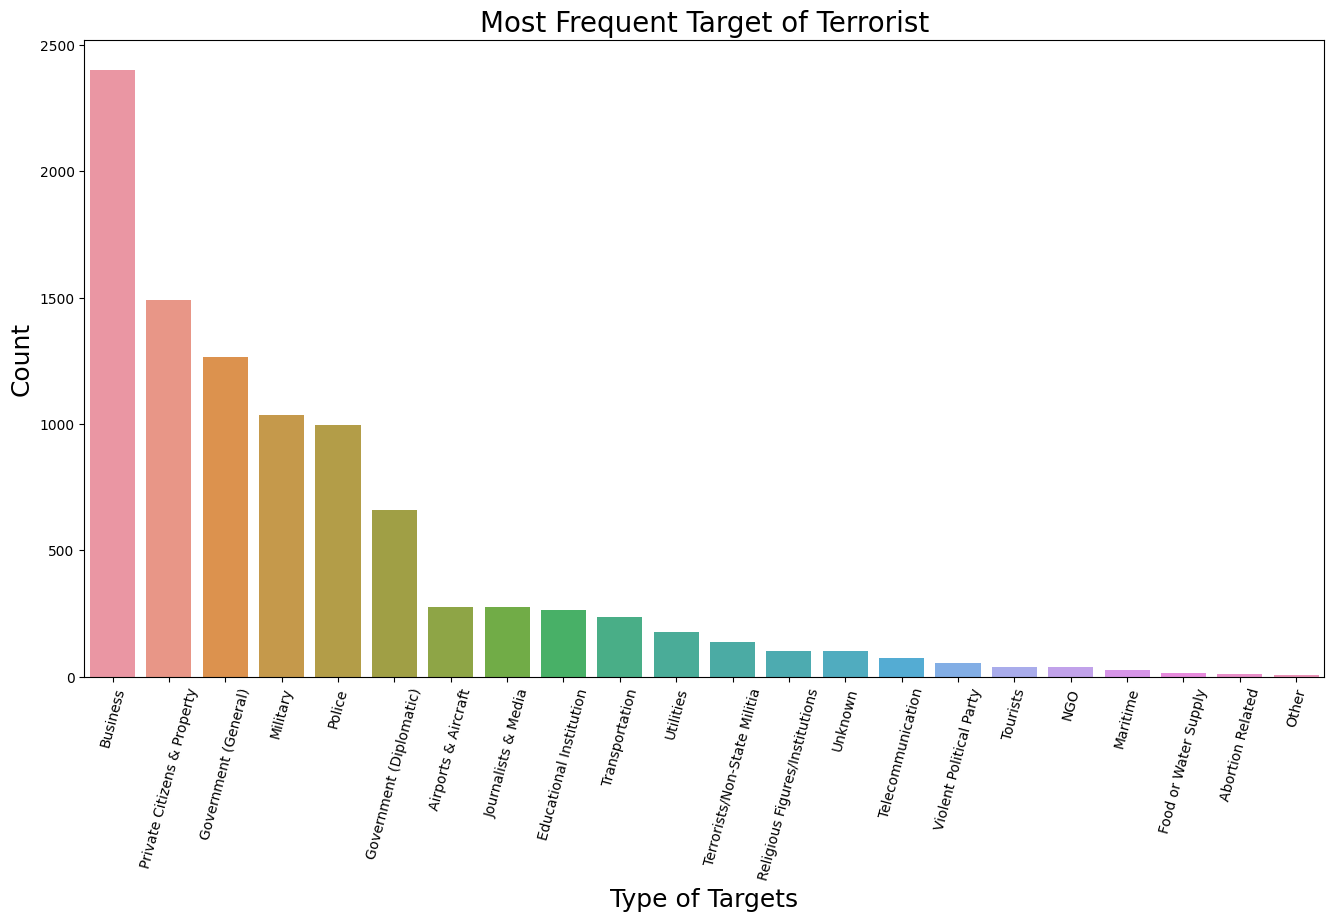

In [32]:
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.countplot(x='targtype1_txt',data=df_1,order = df_1['targtype1_txt'].value_counts().index)
ax.set_xlabel('Type of Targets',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Target of Terrorist',fontsize=20);

In [33]:
print('\n')
print(('*')*20)
print('Value count of Object Type Category which if greater than 50')
print('\n')
print(('*')*20)
cat_col=df_1.select_dtypes('object').columns.to_list()
for col in cat_col:
  if len(df_1[col].value_counts())<50:
    print(df_1[col].value_counts())
    print('\n')
    print(('*')*20)
 




********************
Value count of Object Type Category which if greater than 50


********************
Western Europe                 4594
North America                  1584
Middle East & North Africa     1061
South America                   986
Central America & Caribbean     857
Sub-Saharan Africa              240
Southeast Asia                  191
East Asia                        78
South Asia                       45
Eastern Europe                   26
Australasia & Oceania            16
Name: region_txt, dtype: int64


********************
Bombing/Explosion                      4242
Assassination                          1952
Armed Assault                          1357
Facility/Infrastructure Attack         1072
Hostage Taking (Kidnapping)             527
Unknown                                 278
Hostage Taking (Barricade Incident)     164
Hijacking                                61
Unarmed Assault                          25
Name: attacktype1_txt, dtype: int64


*********

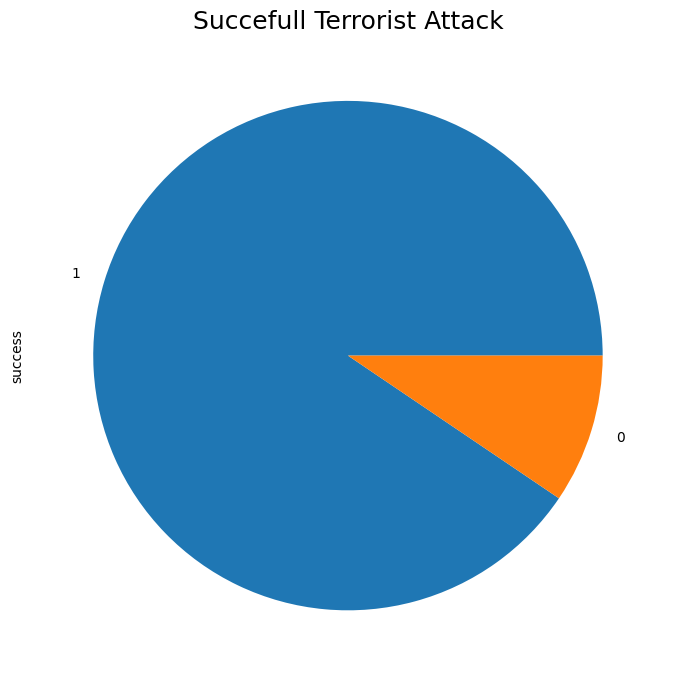

In [34]:
ax=df_1['success'].value_counts().plot(kind='pie')
ax.set_title('Succefull Terrorist Attack',fontsize=18);

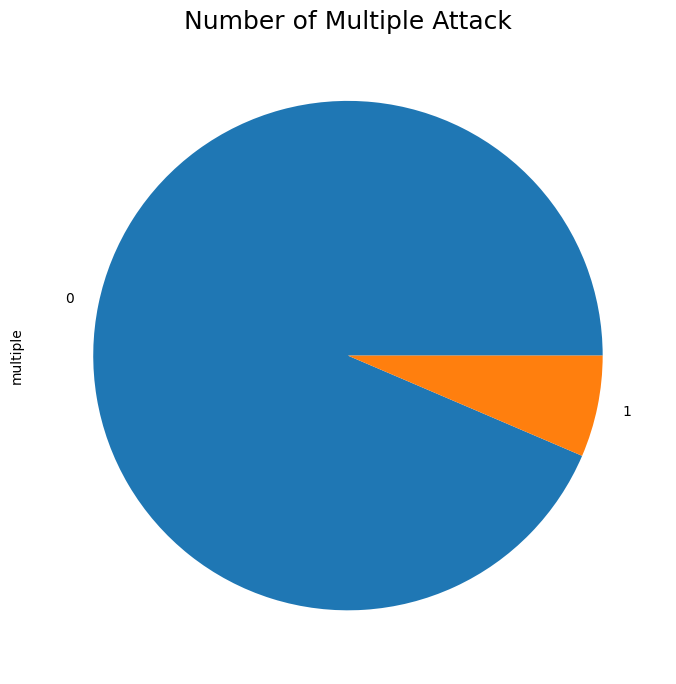

In [35]:
ax=df_1['multiple'].value_counts().plot(kind='pie')
ax.set_title('Number of Multiple Attack',fontsize=18);

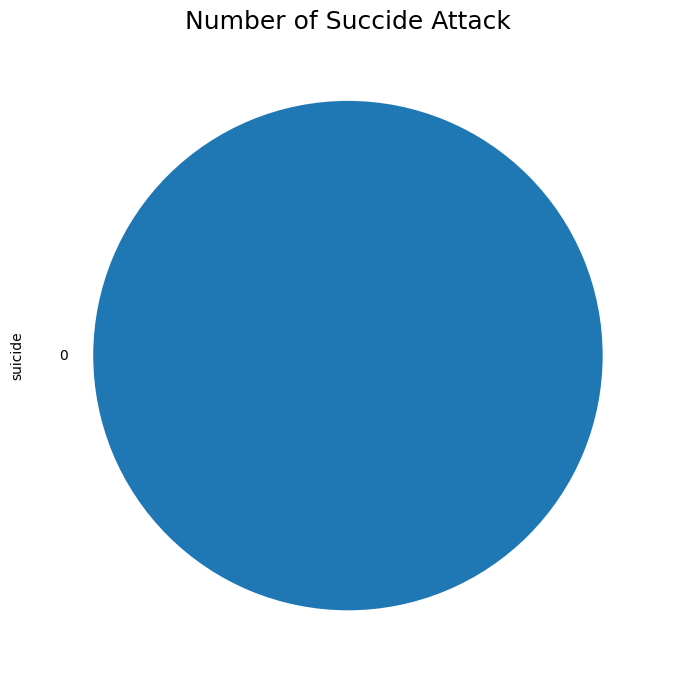

In [36]:
ax=df_1['suicide'].value_counts().plot(kind='pie')
ax.set_title('Number of Succide Attack',fontsize=18);

Countries Perfmance Against Terrorist Atatcks

In [38]:
suceess_country=df_1.groupby('country_txt').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns=['Country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed']=suceess_country['Total_Attacks']-suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack']=(suceess_country['Attack_Failed']/suceess_country['Total_Attacks'])*100
suceess_country['Success_Rate_Attack']=(suceess_country['Attack_Success']/suceess_country['Total_Attacks'])*100
suceess_country=suceess_country.round(2)

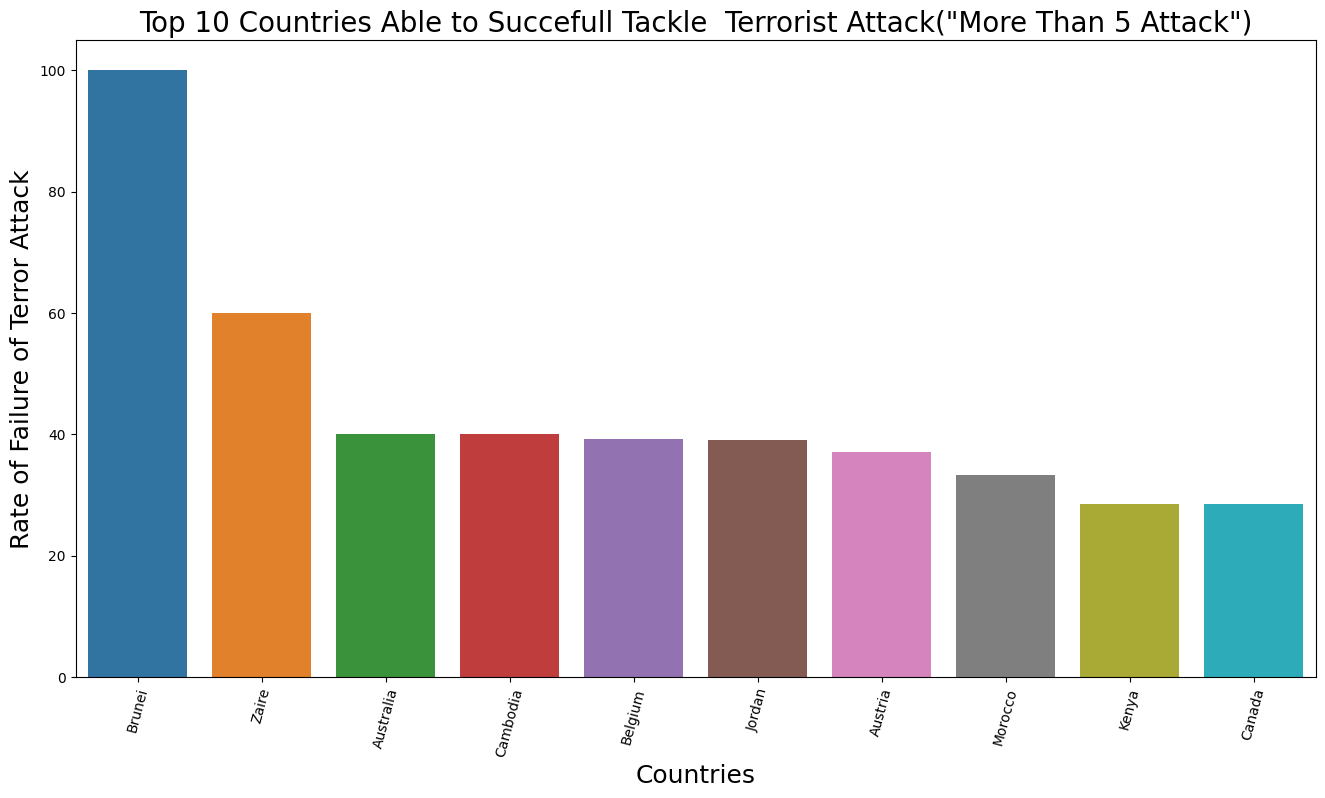

In [39]:
able_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Failure_Rate_Attack',ascending=False )[:10]
plot_able_stop_terror_attack=able_stop_terror_attack.loc[:,['Country','Failure_Rate_Attack']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Failure of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries Able to Succefull Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);
     

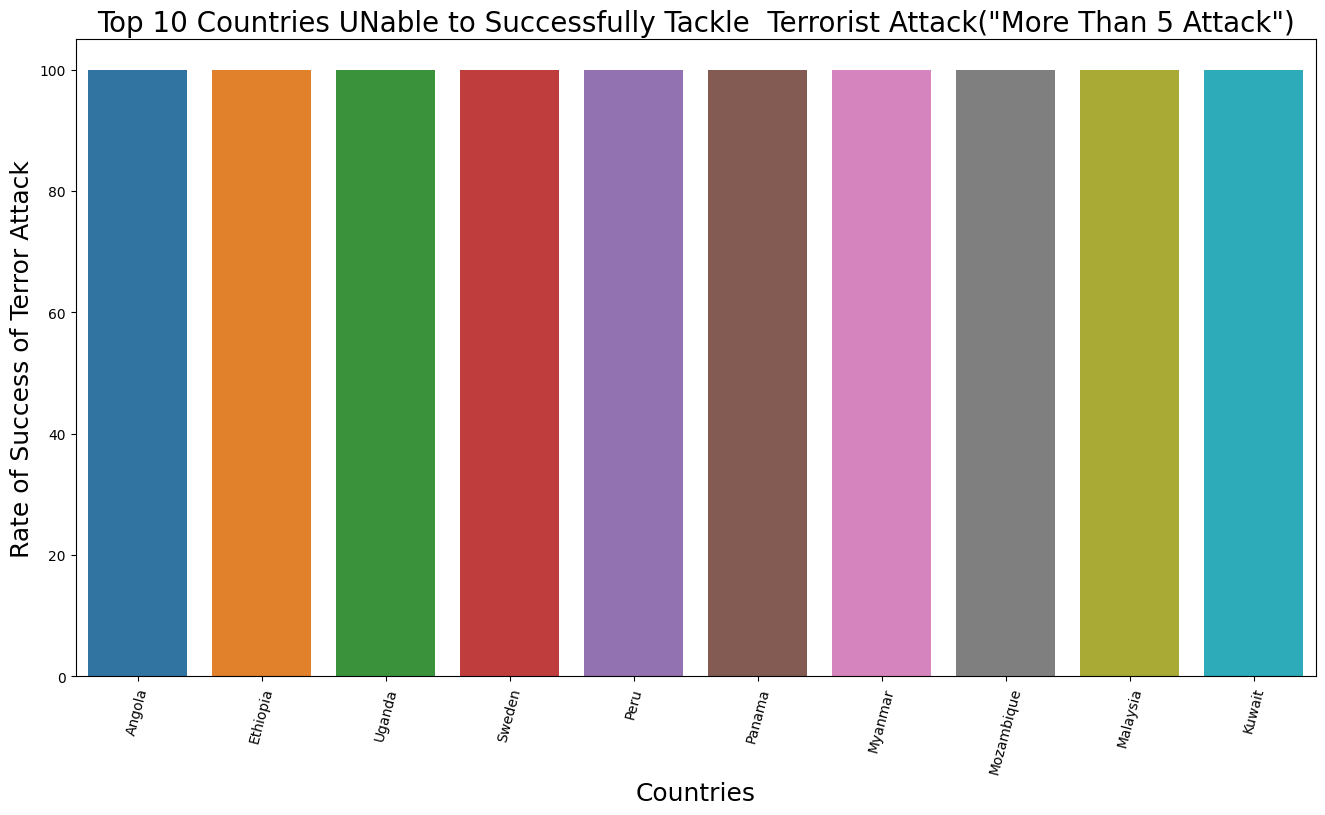

In [40]:
unable_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Success_Rate_Attack',ascending=False )[:10]
plot_unable_stop_terror_attack=unable_stop_terror_attack.loc[:,['Country','Success_Rate_Attack','Total_Attacks']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='Country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Success of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries UNable to Successfully Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

Performing World Cloud

In [42]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

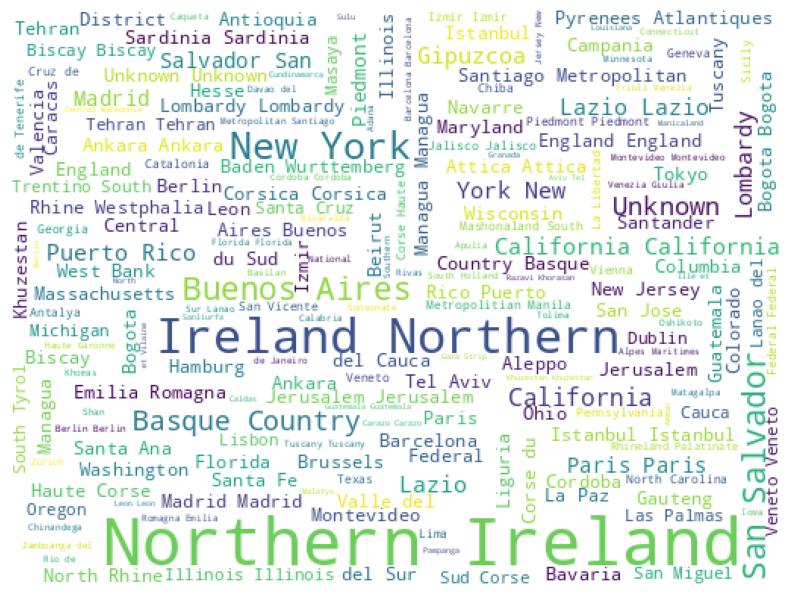

In [43]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()